In [1]:
from activation_visualization import dataset_average, effective_receptive_field, backprop_maximization
from models import SimpleCNN
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
train_data = datasets.CIFAR10(root="../data", train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_data, batch_size=256, shuffle=False)

Files already downloaded and verified


In [3]:
model = SimpleCNN.load("../models/simple3layercnn")

100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


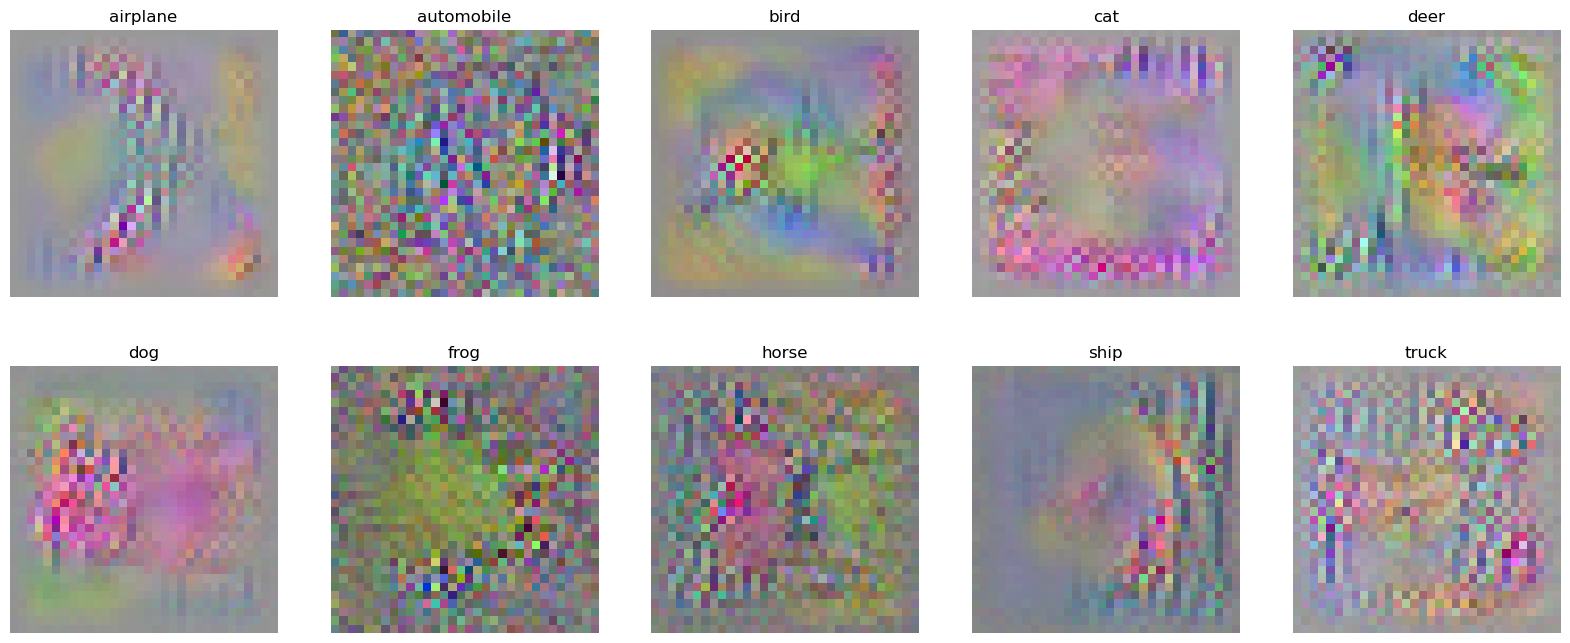

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(20,8))
eff_rfs = []
for class_name, i in tqdm(train_data.class_to_idx.items()):
    desired_output = torch.zeros(10)
    desired_output[i] = 1
    eff_rf = backprop_maximization(model, desired_output, (3,32,32), n_iter=2048, batch_size=1, reduction=True)
    eff_rfs.append(eff_rf)

    ax = axes.flat[i]
    ax.imshow(eff_rf.transpose(0,2))
    ax.axis('off')
    ax.set_title(class_name)

In [5]:
for class_name, i in tqdm(train_data.class_to_idx.items()):
    out = model(eff_rfs[i].repeat(1,1,1,1))
    index = out.argmax()
    prob = out.max()
    print("{cn}: {cn2} - ".format(cn=class_name, cn2=train_data.classes[index]) + "{0:.0%}".format(prob))

100%|██████████| 10/10 [00:00<00:00, 1668.71it/s]

airplane: airplane - 99%
automobile: automobile - 100%
bird: bird - 98%
cat: cat - 99%
deer: deer - 99%
dog: dog - 99%
frog: frog - 100%
horse: horse - 100%
ship: ship - 100%
truck: truck - 100%
